## This Notebook - Goals - FOR EDINA

**What?:**
- R notebook demonstrating a typical data cleaning process
- Use of health data

**Who?:**
- Data Science and statistics students and academics 
- Anyone dealing with data

**Why?:**
- Demonstrate a notebook in a non-python language

**Noteable features to exploit:**
- R notebook
- Visualisation in R
- Sequential steps

**How?:**
- Use of R notebook in wide ranging application

<hr>

# Data cleaning using R

This notebook provides a brief overview of the initial steps of dealing with data in an R notebook.

This tutorial is aimed at people who have some background in data science but are not necessarily familiar with R or R notebooks.

Broadly speaking, "data cleaning" refers to the processing necessary to get from the downloaded data to data fit for analysis. This can be broken down to the following stages:
- Raw data to technically correct data.
- Technically correct data to consistent data.

<em><strong>Note:</strong> Exploratory data analysis (EDA) and data cleaning are different things, but they should be done together, iteratively. This notebook addresses some of the ways to start exploring your data, but the EDA that follows will be different for every data set. The better the data is understood, the better the cleaning will be!</em>

<hr>

# Acquiring data

R comes with some [toy datasets](https://www.rdocumentation.org/packages/datasets/versions/3.6.2) built in, these are fairly small datasets suitable for toy examples such as this.

Of course you can also import your own data, just store your file in the same folder as your notebook and load (as below).

This tutorial will use a csv file from the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) (open license) which contains data about breast cancer. 

First, load the data into a data frame. The variable name used is <code>raw_cervical</code>. This variable will hold the raw data, and will not be altered so that each stage of data cleaning can be reused if desired, like a checkpoint.

In [1]:
# load readr library to notebook (pre-installed on Noteable)
library(readr)

In [2]:
# load the data to the notebook
raw_cervical = readr::read_csv("data/cervical_data.csv")

Warning message:
“Missing column names filled in: 'X33' [33]”
Parsed with column specification:
cols(
  .default = col_double(),
  diagnosis = col_character(),
  X33 = col_character()
)

See spec(...) for full column specifications.

Warning message:
“569 parsing failures.
row col   expected     actual                     file
  1  -- 33 columns 32 columns 'data/cervical_data.csv'
  2  -- 33 columns 32 columns 'data/cervical_data.csv'
  3  -- 33 columns 32 columns 'data/cervical_data.csv'
  4  -- 33 columns 32 columns 'data/cervical_data.csv'
  5  -- 33 columns 32 columns 'data/cervical_data.csv'
... ... .......... .......... ........................
See problems(...) for more details.
”


In [3]:
# wholly unnecessary but I keep forgetting the syntax
#write.csv(raw_cervical, "data/raw_data.csv")

The warning box that appears after running the above cell provides useful information. R tries to inform the reader that there's something strange about the way the data frame is organised:<br>
<code>“Missing column names filled in: 'X33' [33]”</code><br>
This provides a prompt for further investigation.

## Looking at the data

Below are some useful functions to get the general picture of the data, allowing an insight into potential issues that need to be identified and solved.

In [4]:
# output number of rows in data, then columns
nrow(raw_cervical)
ncol(raw_cervical)

[1] 569

[1] 33

In [5]:
# print a few lines that show what the warning describes above
# notice expected vs actual differ in number of columns in data
head(problems(raw_cervical))

row,col,expected,actual,file
<int>,<chr>,<chr>,<chr>,<chr>
1,NA,33 columns,32 columns,'data/cervical_data.csv'
2,NA,33 columns,32 columns,'data/cervical_data.csv'
3,NA,33 columns,32 columns,'data/cervical_data.csv'
4,NA,33 columns,32 columns,'data/cervical_data.csv'
5,NA,33 columns,32 columns,'data/cervical_data.csv'
6,NA,33 columns,32 columns,'data/cervical_data.csv'


The table above shows that there is one more column than expected present in the data.

Time to do a little digging into the issue...

Look at the first couple of rows of data using the <code>head()</code> function:

In [6]:
# output the first few rows of data with headers
head(raw_cervical)

id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,⋯,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,X33
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,⋯,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NA
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,⋯,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NA
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,⋯,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NA
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,⋯,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NA
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,⋯,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NA
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,⋯,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NA


The column names can also be accessed directly:

In [7]:
# output variable names
colnames(raw_cervical)

[1] "id"                      "diagnosis"              
 [3] "radius_mean"             "texture_mean"           
 [5] "perimeter_mean"          "area_mean"              
 [7] "smoothness_mean"         "compactness_mean"       
 [9] "concavity_mean"          "concave points_mean"    
[11] "symmetry_mean"           "fractal_dimension_mean" 
[13] "radius_se"               "texture_se"             
[15] "perimeter_se"            "area_se"                
[17] "smoothness_se"           "compactness_se"         
[19] "concavity_se"            "concave points_se"      
[21] "symmetry_se"             "fractal_dimension_se"   
[23] "radius_worst"            "texture_worst"          
[25] "perimeter_worst"         "area_worst"             
[27] "smoothness_worst"        "compactness_worst"      
[29] "concavity_worst"         "concave points_worst"   
[31] "symmetry_worst"          "fractal_dimension_worst"
[33] "X33"

If you glance over the column names, the last one looks out of place. Looking again at the table produced by <code>head()</code>, the first few rows of this column seem to be NA values. 

You can attain summary information for individual variables:

In [8]:
# output summary statistics for radius_mean variable
summary(raw_cervical$radius_mean)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.981  11.700  13.370  14.127  15.780  28.110 

Or indeed the whole data set, although this can become quite unwieldy. This has been commented out, so just remove the <code>#</code> at the beginning of the line to run the function again.

In [9]:
# output summary statistics for whole data set
#summary(raw_cervical)

Even from these few cells, we have a lot more information than we did to begin with!

There are 569 samples, and 33 columns. We have the names for each column, as well as the first few samples for each. We have identified that the last column is not expected, and only seems to contain NA values.

## Contextualising data - using what's given

Above, there are a range of tools used to examine what is present in the data. Additional context can (and should) be added by reading the author's description (available [here](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)) of the data. 

Key information given about the data:

Context:
- Features computed from image of a [fine needle aspirate](https://en.wikipedia.org/wiki/Fine-needle_aspiration) of a breast mass.
- Features describe characteristics of cell nuceli in image.
- 569 instances
- 32 attributes
- Class distribution: 357 benign, 212 malignant
- No missing values

Attributes:
- ID in field 1
- Predicting field 2, diagnosis - B=benign, M=malignant
- Columns 3-32 contain the mean, standard error and "worst"/largest values of 10 different features. Where "worst" is mean of three largest values. 
- The 10 features are:
    - radius (mean distance from center to perimeter)
    - texture (standard deviation of grey-scale image values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness $\frac{{perimeter}^2}{area - 1.0}$
    - concavity (severity of concave portions of contour)
    - number of concave portions of contour
    - symmetry
    - fractal dimension $({coastline approximation}) - 1$
- Columns 3-32 are organised as follows:
    - 3-12: mean for each feature
    - 13-22: standard error for each feature
    - 23-32: "worst" value for each feature

<hr>

# Cleaning - from raw to technically correct data

In essence, the getting the data to be "technically correct" involves identifying errors and inconsistencies in your data. The names, types and labels in the data need to make sense. Luckily, this dataset is not too messy, but if it were, this step would ensure that R could access the data so that we can do more with it!

For example, if a height variable is stored as a string "1", this step would involve ensuring that R reads the value as a number, not a string of characters.

The goal of this step:
- The data is stored in a data.frame.
- The columns of the data.frame are suitable.
- Each column uses an appropriate type to represent the values in it.
    - Numeric data stored as <code>numeric/integer</code>.
    - Text data stored as <code>character</code> (for single characters and strings).
    - Categorical data stored as <code>factor/ordered</code>.
    - True/false data stored as <code>logical</code>.
    
Steps to reach the goal:
- Removing unused/irrelevant columns/rows / cols with 0 variance.
- Renaming variables for consistency and meaning.
- Encode missing values appropriately (if required).
- Remove duplicates (if this doesnt cause loss of information).
- Fix dates (common bugbear).
- Fix strings (another common bugbear).
- Recoding vectors (eg: use 0 and 1 instead of yes/no).

### Irrelevant columns/rows and columns with 0 variance

Time to revisit the weird 33rd column from earlier.

By checking the description of the data, as well as other people's comments online on [kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data) it seems like column 33 shouldn't be there, and got read in by mistake. 

<b>Why did this happen?</b><br> By opening the csv file (just click on the file name in Noteable) I can see that the first line (header) ends with a comma, meaning that its still trying to read another heading and thinks there are 32 columns.

Seems safe to get rid of it, since the mistake is understood and confirmed by others. 

Removing the **irrelevant column**:

In [10]:
# the last column of the data (will print many NA's) - uncomment to run
#raw_cervical$X33

In [11]:
# remove col 33, X33 (meaningless)
nas_cervical <- cbind(raw_cervical[-33])

Great! The unnecessary column is gone. Bear in mind that the data frame without NA's is stored in the <code>nas_cervical</code> variable, the <code>raw_cervical</code> is left as it was. From now on, use the <code>nas_cervical</code> data frame!

The original data description claims that there is no missing data at all in the dataset. Hopefully, that's the case now. To double check:

In [12]:
# prints nothing because none found!
# apply function used to check every column (dimension 2)
apply(is.na(nas_cervical),2,which)

integer(0)

It can also sometimes be useful to check for infinity and NaN (not a number) values in the data. This is just an extension of what has already been done here, and follows the same idea.

If NA values are found in your data, libraries [naniar](https://cran.r-project.org/web/packages/naniar/vignettes/getting-started-w-naniar.html) and [knitr](https://yihui.org/knitr/) provide useful functions to visualise missing data.

Sometimes, the purpose of data cleaning is to get it ready to answer a specific question about the variables. In these cases, it is sometimes appropriate to remove columns or samples that are unrelated to the question. 

Since the purpose here is to understand the data, no rows or columns need to be deleted on this basis.

Empty rows and columns can be removed by using the <code>remove_empty()</code> function in the [janitor](https://cran.r-project.org/web/packages/janitor/vignettes/janitor.html) package.

Columns with 0 variance are not very informative. If the variable changes nothing, its completely constant, why should it bulk up the data?

The following cell checks for 0 variance columns in the numerical data.

In [13]:
# extract only numerical columns
num_cervical <- cbind(nas_cervical[-2])

# check for 0 variance columns
which(apply(num_cervical,2, var)==0)

named integer(0)

see also <code>remove_constant()</code> from the [janitor](https://cran.r-project.org/web/packages/janitor/vignettes/janitor.html) package to remove 0 variance columns from data.

### Variable names

This is also a good time to check for unhelpful or confusing variable names:

In [14]:
# read column names
colnames(nas_cervical) 

[1] "id"                      "diagnosis"              
 [3] "radius_mean"             "texture_mean"           
 [5] "perimeter_mean"          "area_mean"              
 [7] "smoothness_mean"         "compactness_mean"       
 [9] "concavity_mean"          "concave points_mean"    
[11] "symmetry_mean"           "fractal_dimension_mean" 
[13] "radius_se"               "texture_se"             
[15] "perimeter_se"            "area_se"                
[17] "smoothness_se"           "compactness_se"         
[19] "concavity_se"            "concave points_se"      
[21] "symmetry_se"             "fractal_dimension_se"   
[23] "radius_worst"            "texture_worst"          
[25] "perimeter_worst"         "area_worst"             
[27] "smoothness_worst"        "compactness_worst"      
[29] "concavity_worst"         "concave points_worst"   
[31] "symmetry_worst"          "fractal_dimension_worst"

In this case, the variables are named helpfully. If the variable names need to be changed, you can use the <code>clean_names()</code> function from the [janitor](https://cran.r-project.org/web/packages/janitor/vignettes/janitor.html) package.

### Duplicates

R has some useful functions for dealing with duplicates in data. Packages are available, but base R packages work fine here.

Here <code>anyDuplicated()</code> is used, but it may be worth looking at <code>duplicated()</code> and <code>unique()</code>.

In [15]:
# check for duplicates
anyDuplicated(nas_cervical)

[1] 0

[anyDuplicated()](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/duplicated) returns 0, so no duplicate rows in data. easy. If there were, [unique()](https://www.rdocumentation.org/packages/base/versions/3.6.2/topics/unique) could be used to reduce the data frame.

### Fix classes of each column - recode factors

common activities at this stage include:
- Checking if there are dates that are inevitably wrongly input can be fixed somehow.
- Fix strings to make sense because I guarantee they do not right now.
- Recode categorical data to usable factors maybe numbers maybe booleans not sure will get back to you.

In R, there are 2 main ways to retrieve class information:

In [16]:
# get class for each column - uncomment to run
#lapply(nas_cervical,class)

In [17]:
# display structure of object - uncomment to run
#str(nas_cervical)

In [18]:
# look at first 20 values in column
head(nas_cervical$diagnosis, 20)

[1] "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M" "M"
[20] "B"

In [19]:
# forces numeric 0 or 1 for values
nas_cervical$diagnosis <- gsub('M', "1", nas_cervical$diagnosis)
nas_cervical$diagnosis <- gsub('B', "0", nas_cervical$diagnosis)
nas_cervical$diagnosis <- as.numeric(nas_cervical$diagnosis)

# print first 20 values of column
head(nas_cervical$diagnosis, 20)

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0

<em><strong>Note:</strong> when you do something like this, make sure its clear to the reader of your work what has been done. 1 and 0 mean nothing out of context, but as the person writing the code, you understand that 1 represents M in the original data, and 0 represents B.</em>

### Dates and strings

It is fairly common to have problems with dates and strings in data. This is not a problem in this dataset, but this should be checked. the [lubridate](https://lubridate.tidyverse.org) package provides good support for this

<hr>

# Cleaning - from technically correct to consistent data

Just because the data is technically correct doesn't mean it makes sense. This is another reason why context is important.

For data to be consistent, it should be ready for inference.

Goal for this step:
- Data is stored in a suitable data frame, ready for inference!

Steps to reach the goal:
- Variable constraints addressed (eg: can age=-35?).
- Missing values - addressing strategies to get the most from data with missing values.
- Dealing with outliers.

### Variable Constraints

Can someone's age be -35? Can someone be married, divorced, single and pregnant all at the same time?

These are the sorts of questions to ask at this stage.

This step is very subject specific. This absolutely requires subject knowledge. As the data analyist, it can be helpful to ask people in that discipline if the values make sense. In this case, the data is well documented and reviewed, there are no variable constraints of note.

This step isnt included in this guide because it can be a long step, and this data is quite well documented. Generally speaking though, this is a useful step in ensuring that variables are correctly labelled and contain useful information that actually makes sense. Correcting variable constraint violations is an art - not to be taken lightly.

Checking out the [editrules](https://cran.r-project.org/web/packages/editrules/index.html) package is a good place to start. In particular, look at the <code>editset()</code> and <code>violatedEdits()</code> functions.

### Outliers

There are many different ways to deal with outliers (again, context dependant). You may wish to remove all rows with missing values, remove irrlevant variables then remove rows with missing values, or employ some other method.

Outliers:<br>
This step has two stages: identify and then treat. It is not as simple as removal, because this will affect the data in (possibly) unintended ways. Previous steps involved changing the way the data was represented. This step involves meaningfully changing what is happening in the data, this is a delicate operation. 

<b>What is an outlier?</b><br>
An unusual bit of data. "Unusual" is (obviously) quite a context sensitive term. The idea of an outlier *at all* depends on the data that you have.

One common way to look for outliers is to use boxplots:

[1] 25.22 22.27 24.25 23.27 27.22 23.29 28.11 23.21 23.51 25.73 22.01 27.42
[13] 23.09 24.63

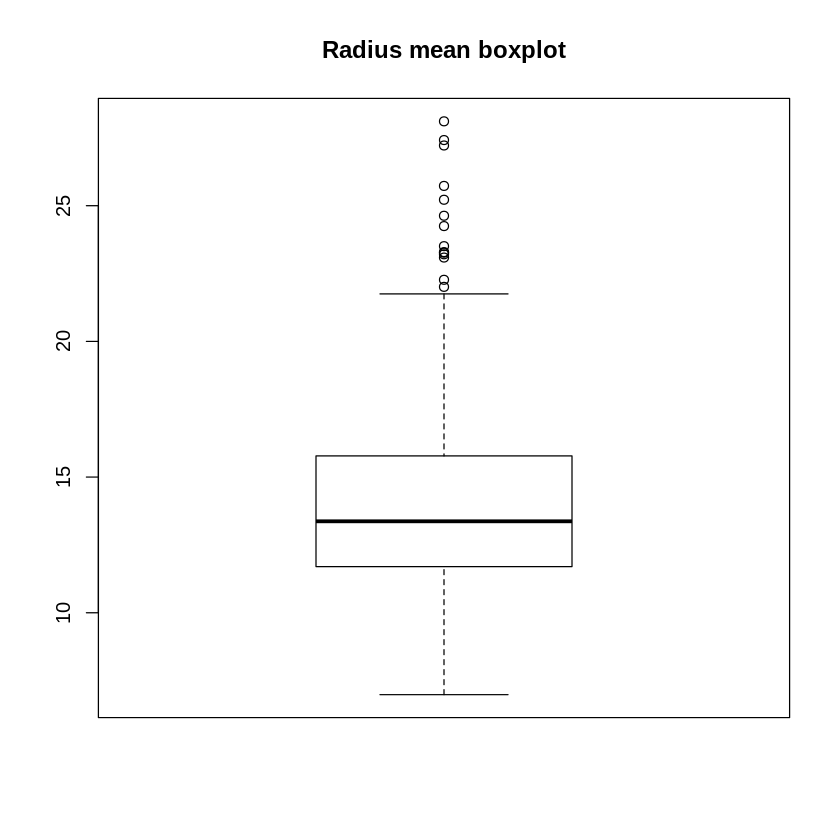

In [20]:
# find outlier points for the radius_mean variable in the data.
boxplot.stats(nas_cervical$radius_mean)$out

boxplot(nas_cervical$radius_mean, main="Radius mean boxplot")

You can also plot data that meets a certain condition. The next plot only uses data for which the diagnosis variable is 1.

In [21]:
# import for filtering functions
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [22]:
# select data with diagnoses of 1
melignant <- dplyr::filter(nas_cervical, diagnosis==1)

[1] 27.22 28.11 27.42

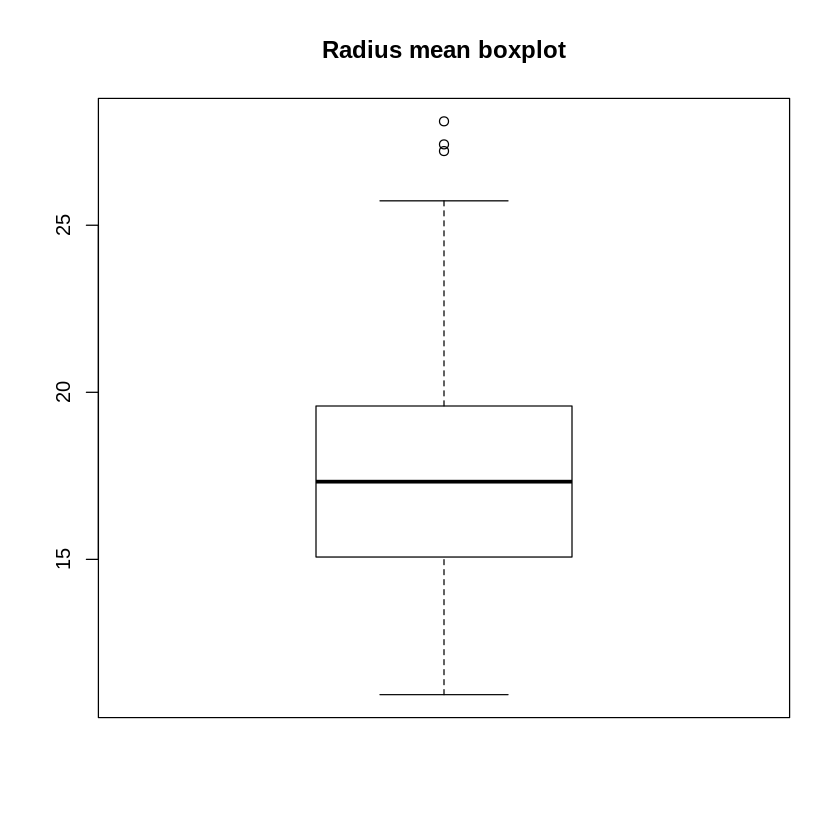

In [23]:
# boxplot result
boxplot.stats(melignant$radius_mean)$out
boxplot(melignant$radius_mean, main="Radius mean boxplot")

<hr>

## Summary

This notebook has covered the basics of looking at and cleaning data. Additionally, some links have been provided to useful libraries!